In [1]:
sub_num=58
#sub-0'+str(sub_num)+'_task-memory_beh
import pandas as pd
import numpy as np
df = pd.read_csv('D:\\WM_openneuro_dataset\\sub-0'+str(sub_num)+'_beh_sub-0'+str(sub_num)+'_task-memory_beh.tsv', sep='\t')
easy_evaluating=df['partialScore']
strict_evaluating=df['NCorrect']
num_digit=df['condition']
num_trial=df.shape[0]
easy_score=np.empty([sh,1])
strict_score=np.empty([sh,1])
for i in range(num_trial):
    easy_score[i]=(easy_evaluating[i]/num_digit[i])
    strict_score[i]=(strict_evaluating[i]/num_digit[i])

easy=np.mean(easy_score)
strict=np.mean(strict_score)
behaviour_score=np.array([strict,easy])
print(behaviour_score)
np.save('s'+str(sub_num)+'behaviour_score',behaviour_score)

PermissionError: [Errno 13] Permission denied: 'D:\\WM_openneuro_dataset\\sub-058_beh_sub-058_task-memory_beh.tsv'

In [58]:
import numpy as np
hh=np.array([32,34,35,36,38,39,40,41,43,44,45,46,48,49,50,51,52,53,54,55,62,63,64,
             68,69,70,71,72,73,75,79,80,81,82,83,84,85,86,88,89,90,91,92,93,94,96,97,98])
beh_all=np.empty((0,2))
for i in range(48):
    c_c=np.load('s'+str(hh[i])+'behaviour_score.npy')
    c_c=c_c.reshape((1,c_c.shape[0]))
    beh_all=np.append(beh_all,c_c,axis=0)
    stric=stats.zscore(beh_all[:,0])

In [3]:
import numpy as np
from scipy import stats
hh=np.array([32,34,35,36,38,39,40,41,43,44,45,46,48,49,50,51,52,53,54,55,62,63,64,
             68,69,70,71,72,73,75,79,80,81,82,83,84,85,86,88,89,90,91,92,93,94,96,97,98])
power=np.empty((0,560))
normalized_power=np.empty((0,560))
for i in range(48):
    cc=np.load('s'+str(hh[i])+'_band_power_all_band.npy')
    cc_del = np.delete(cc,[range(560,588,1)])
    cc_del=cc_del.reshape((1,560))
    power=np.append(power,cc_del,axis=0)

In [6]:
power[47,559]

(48, 560)

In [32]:

normalized_power=np.empty((48,560))   
for n in range(560):
    normalized_power[:,n]=stats.zscore(power[:,n])

In [57]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
vv=np.empty((560))
for ii in range(560):
    h1=scipy.stats.mstats.kendalltau(stric, normalized_power[:,ii])  
    corr=h1[0]
    vv[ii]=corr
signif=np.argwhere(vv>0.29)
print(signif)

[]


In [62]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
vv=np.empty((560))
for ii in range(560):
    h1=scipy.stats.pearsonr(stric, normalized_power[:,ii])  
    corr=h1[0]
    vv[ii]=corr
    
signif=np.argwhere(vv>0.3)
print(signif)

[[125]
 [475]]


In [61]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
vv=np.empty((560))
for ii in range(560):
    h1=scipy.stats.mstats.spearmanr(stric, normalized_power[:,ii])  
    corr=h1[0]
    vv[ii]=corr
    
signif=np.argwhere(vv>0.3)
print(signif)

[[169]
 [253]
 [254]
 [260]
 [475]
 [533]]


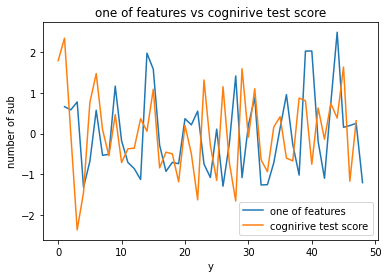

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()

# Creating subplot/axes
ax = fig.add_subplot(111)

# Setting axes/plot title
ax.set_title('one of features vs cognirive test score')

plt.plot(range(1,49,1),normalized_power[:,475], stric)
# Setting X-axis and Y-axis labels
ax.set_ylabel('number of sub')
ax.set_xlabel('y')
ax.legend(['one of features', 'cognirive test score'])

# Showing the plot
plt.show()

1.5528945984057418 -0.5528945984057418


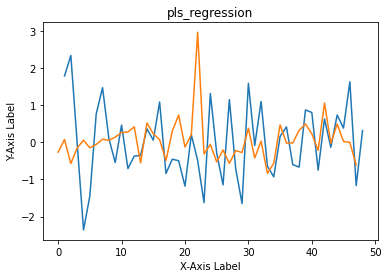

1.5528945984057418 -0.5528945984057418


In [76]:

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score
from sys import stdout
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
# Define PLS object
pls = PLSRegression(n_components=1)
 
# Fit
pls.fit(normalized_power, stric)
 
# Cross-validation
y_cv = cross_val_predict(pls,normalized_power, stric, cv=5)
 
# Calculate scores
score = r2_score(stric, y_cv)
mse = mean_squared_error(stric, y_cv)
print(mse, score)
from sklearn.metrics import r2_score


fig = plt.figure()

# Creating subplot/axes
ax = fig.add_subplot(111)

# Setting axes/plot title
ax.set_title('pls_regression')

plt.plot(range(1,49,1), stric,y_cv )
# Setting X-axis and Y-axis labels
ax.set_ylabel('Y-Axis Label')
ax.set_xlabel('X-Axis Label')

# Showing the plot
plt.show()
print(mse, r2_score)

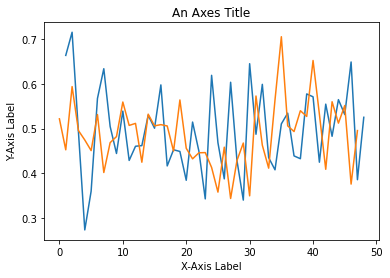

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()

# Creating subplot/axes
ax = fig.add_subplot(111)

# Setting axes/plot title
ax.set_title('An Axes Title')

plt.plot(range(1,49,1), stric,y_cv )
# Setting X-axis and Y-axis labels
ax.set_ylabel('Y-Axis Label')
ax.set_xlabel('X-Axis Label')

# Showing the plot
plt.show()

1.2532438024209158 -0.2532438024209158


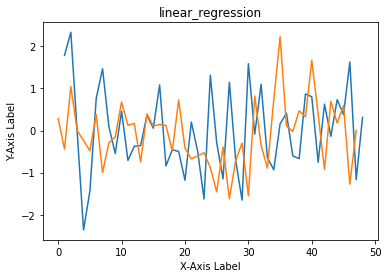

1.2532438024209158 -0.2532438024209158


In [77]:
# importing module
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(normalized_power,stric)
y_cv = cross_val_predict(LR,normalized_power, stric, cv=5)
# predicting the accuracy score
score=r2_score(stric,y_cv)
mse=mean_squared_error(stric,y_cv)
print(mse, score)


fig = plt.figure()

# Creating subplot/axes
ax = fig.add_subplot(111)

# Setting axes/plot title
ax.set_title('linear_regression')

plt.plot(range(1,49,1), stric,y_cv )
# Setting X-axis and Y-axis labels
ax.set_ylabel('Y-Axis Label')
ax.set_xlabel('X-Axis Label')

# Showing the plot
plt.show()
print(mse,r2_score)

In [54]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(normalized_power)
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features,stric)
y_cv = cross_val_predict(poly_reg_model,normalized_power, stric, cv=5)
# predicting the accuracy score
score=r2_score(stric,y_cv)
mse=mean_squared_error(stric,y_cv)
print(mse, score)

fig = plt.figure()

# Creating subplot/axes
ax = fig.add_subplot(111)

# Setting axes/plot title
ax.set_title('linear_regression')

plt.plot(range(1,49,1), stric,y_cv )
# Setting X-axis and Y-axis labels
ax.set_ylabel('Y-Axis Label')
ax.set_xlabel('X-Axis Label')

# Showing the plot
plt.show()
print(mse,r2_score)

0.01116598134130087 -0.25714057111402866


1.4274013269899521 -0.42740132698995215


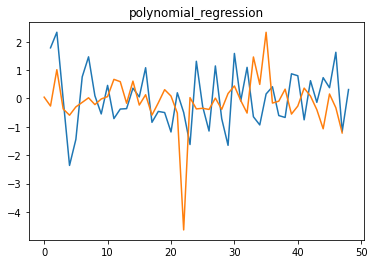

In [79]:
# importing libraries for polynomial transform
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(normalized_power,stric.reshape(-1,1))
y_cv = cross_val_predict(pipe,normalized_power, stric, cv=5)
# predicting the accuracy score
score=r2_score(stric,y_cv)
mse=mean_squared_error(stric,y_cv)
print(mse, score)

fig = plt.figure()
# Setting axes/plot title

# Creating subplot/axes
ax = fig.add_subplot(111)
ax.set_title('polynomial_regression')
plt.plot(range(1,49,1), stric,y_cv)
# Showing the plot
plt.show()

In [1]:
import numpy as np
beh_s32=np.load('s32behaviour_score.npy')
beh_s33=np.load('s33behaviour_score.npy')
beh_s34=np.load('s34behaviour_score.npy')
beh_s35=np.load('s35behaviour_score.npy')
beh_s36=np.load('s36behaviour_score.npy')
#beh_s37=np.load('s37behaviour_score.npy')
beh_s38=np.load('s38behaviour_score.npy')
beh_s39=np.load('s39behaviour_score.npy')
beh_s40=np.load('s40behaviour_score.npy')
beh_s41=np.load('s41behaviour_score.npy')
beh_s42=np.load('s42behaviour_score.npy')
beh_s43=np.load('s43behaviour_score.npy')
beh_s44=np.load('s44behaviour_score.npy')
beh_s45=np.load('s45behaviour_score.npy')
beh_s46=np.load('s46behaviour_score.npy')
beh_s47=np.load('s47behaviour_score.npy')
beh_s48=np.load('s48behaviour_score.npy')
beh_s49=np.load('s49behaviour_score.npy')
beh_s50=np.load('s50behaviour_score.npy')
beh_s51=np.load('s51behaviour_score.npy')
beh_s52=np.load('s52behaviour_score.npy')
beh_s53=np.load('s53behaviour_score.npy')
beh_s54=np.load('s54behaviour_score.npy')
beh_s55=np.load('s55behaviour_score.npy')
beh_s56=np.load('s56behaviour_score.npy')
beh_s57=np.load('s57behaviour_score.npy')
beh_s58=np.load('s58behaviour_score.npy')
beh_s59=np.load('s59behaviour_score.npy')
beh_s60=np.load('s60behaviour_score.npy')
beh_s61=np.load('s61behaviour_score.npy')
beh_s62=np.load('s62behaviour_score.npy')
beh_s63=np.load('s63behaviour_score.npy')
beh_s64=np.load('s64behaviour_score.npy')
beh_s65=np.load('s65behaviour_score.npy')
#beh_s66=np.load('s66behaviour_score.npy')
beh_s67=np.load('s67behaviour_score.npy')
beh_s68=np.load('s68behaviour_score.npy')
beh_s69=np.load('s69behaviour_score.npy')
beh_s70=np.load('s70behaviour_score.npy')
beh_s71=np.load('s71behaviour_score.npy')
beh_s72=np.load('s72behaviour_score.npy')
beh_s73=np.load('s73behaviour_score.npy')
beh_s74=np.load('s74behaviour_score.npy')
beh_s75=np.load('s75behaviour_score.npy')
beh_s76=np.load('s76behaviour_score.npy')
beh_s77=np.load('s77behaviour_score.npy')
beh_s78=np.load('s78behaviour_score.npy')
beh_s79=np.load('s79behaviour_score.npy')
beh_s80=np.load('s80behaviour_score.npy')
beh_s81=np.load('s81behaviour_score.npy')
beh_s82=np.load('s82behaviour_score.npy')
beh_s83=np.load('s83behaviour_score.npy')
beh_s84=np.load('s84behaviour_score.npy')
beh_s85=np.load('s85behaviour_score.npy')
beh_s86=np.load('s86behaviour_score.npy')
beh_s87=np.load('s87behaviour_score.npy')
beh_s88=np.load('s88behaviour_score.npy')
beh_s89=np.load('s89behaviour_score.npy')
beh_s90=np.load('s90behaviour_score.npy')
beh_s91=np.load('s91behaviour_score.npy')
beh_s92=np.load('s92behaviour_score.npy')
beh_s93=np.load('s93behaviour_score.npy')
beh_s94=np.load('s94behaviour_score.npy')
beh_s95=np.load('s95behaviour_score.npy')
beh_s96=np.load('s96behaviour_score.npy')
beh_s97=np.load('s97behaviour_score.npy')
beh_s98=np.load('s98behaviour_score.npy')
beh_analys=np.vstack((beh_s32,beh_s33,beh_s34,beh_s35,beh_s36,beh_s38,beh_s39,beh_s40,beh_s41,beh_s42,beh_s43,beh_s44,
beh_s45,beh_s46,beh_s47,beh_s48,beh_s49,beh_s50,beh_s51,beh_s52,beh_s53,beh_s54,beh_s55,beh_s56,
beh_s57,beh_s58,beh_s59,beh_s60,beh_s61,beh_s62,beh_s63,beh_s64,beh_s65,beh_s67,beh_s68,beh_s69,
beh_s70,beh_s71,beh_s72,beh_s73,beh_s74,beh_s75,beh_s76,beh_s77,beh_s78,beh_s79,beh_s80,beh_s81,
beh_s82,beh_s83,beh_s84,beh_s85,beh_s86,beh_s87,beh_s88,beh_s89,beh_s90,beh_s91,beh_s92,beh_s93,
beh_s94,beh_s95,beh_s96,beh_s97,beh_s98))

In [84]:
g=np.array([1,2,3,4])
signif=np.argwhere(g<4)
print(signif)

[[0]
 [1]
 [2]]


In [110]:
print(power.shape)

(48, 588)


ValueError: x and y must be the same size

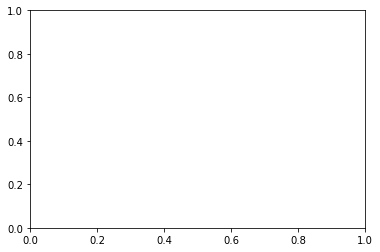

In [118]:
 #Polynomial Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
X = power[:,[475,125]]
y = stric

# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)"""

# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.show()

# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.show()

# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.show()

# Predicting a new result with Linear Regression
lin_reg.predict(6.5)
# Predicting a new result with Polynomial Regression
lin_reg_2.predict(poly_reg.fit_transform(6.5))